# 94-775/95-865: Handwritten Digit Recognition with Neural Nets

Author: George H. Chen (georgechen [at symbol] cmu.edu)

This demo shows how to train and evaluate four neural net models using PyTorch:

1. Flatten -> fully connected -> softmax activation*

2. Flatten -> fully connected -> ReLU -> fully connected -> softmax activation*

3. Conv2d -> ReLU -> MaxPool2d -> flatten -> fully connected -> softmax activation*

4. Conv2d -> ReLU -> MaxPool2d -> Conv2d -> ReLU -> MaxPool2d -> flatten -> fully connected -> softmax activation*

*In PyTorch, softmax activation is automatically done as part of using the cross entropy loss.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

# the next two lines are needed on my Intel-based MacBook Air to get the code to run; you likely don't need these two lines...
# (in fact I used to not need these two lines)
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

import torch
torch.use_deterministic_algorithms(True)
torch.backends.cudnn.benchmark = False
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchsummaryX import summary

from UDA_pytorch_utils import UDA_pytorch_classifier_fit, \
        UDA_plot_train_val_accuracy_vs_epoch, UDA_pytorch_classifier_predict, \
        UDA_compute_accuracy

np.random.seed(0)
torch.manual_seed(0)
random.seed(0)

## Loading in the data and a quick data inspection¶

In [2]:
train_dataset = torchvision.datasets.MNIST(root='data/',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

In [3]:
train_images = torch.tensor(np.array([image.numpy() for image, label in train_dataset]))

In [4]:
train_labels = torch.tensor([label for image, label in train_dataset])

In [5]:
train_images.shape

torch.Size([60000, 1, 28, 28])

In [6]:
train_labels.shape

torch.Size([60000])

We first take a look at the data.

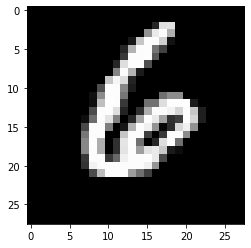

In [7]:
plt.imshow(train_images[13][0], cmap='gray')

In [8]:
train_labels[13]

tensor(6)

## Basics of working with neural nets

In [9]:
simple_model = nn.Sequential(nn.Flatten(),
                             nn.Linear(in_features=784, out_features=10))

In [10]:
summary(simple_model, torch.zeros((5, 1, 28, 28)))   # (batch size, num channels, height, width)

      Kernel Shape Output Shape Params Mult-Adds
Layer                                           
0_0              -     [5, 784]      -         -
1_1      [784, 10]      [5, 10]  7.85k     7.84k
--------------------------------------------------
                      Totals
Total params           7.85k
Trainable params       7.85k
Non-trainable params     0.0
Mult-Adds              7.84k


/Users/georgehc/opt/anaconda3/lib/python3.9/site-packages/torchsummaryX/torchsummaryX.py:101: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sum = df.sum()


,Kernel Shape,Output Shape,Params,Mult-Adds
Layer,,,,
0_0,-,"[5, 784]",NaN,NaN
1_1,"[784, 10]","[5, 10]",7850.0,7840.0


In [11]:
proper_train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - proper_train_size
proper_train_dataset, val_dataset = torch.utils.data.random_split(train_dataset,
                                                                  [proper_train_size,
                                                                   val_size])

In [12]:
num_epochs = 10  # during optimization, how many times we look at training data
batch_size = 128  # during optimization, how many training data to use at each step
learning_rate = 0.001  # during optimization, how much we nudge our solution at each step

train_accuracies, val_accuracies = \
    UDA_pytorch_classifier_fit(simple_model,
                               torch.optim.Adam(simple_model.parameters(),
                                                lr=learning_rate),
                               nn.CrossEntropyLoss(),  # includes softmax
                               proper_train_dataset, val_dataset,
                               num_epochs, batch_size)

Epoch 1 [==================================================] 48000/48000
  Train accuracy: 0.8913
  Validation accuracy: 0.8873
Epoch 2 [==================================================] 48000/48000
  Train accuracy: 0.9075
  Validation accuracy: 0.9046
Epoch 3 [==================================================] 48000/48000
  Train accuracy: 0.9125
  Validation accuracy: 0.9107
Epoch 4 [==================================================] 48000/48000
  Train accuracy: 0.9179
  Validation accuracy: 0.9127
Epoch 5 [==================================================] 48000/48000
  Train accuracy: 0.9194
  Validation accuracy: 0.9147
Epoch 6 [==================================================] 48000/48000
  Train accuracy: 0.9229
  Validation accuracy: 0.9166
Epoch 7 [==================================================] 48000/48000
  Train accuracy: 0.9254
  Validation accuracy: 0.9178
Epoch 8 [==================================================] 48000/48000
  Train accuracy: 0.9266
  Vali

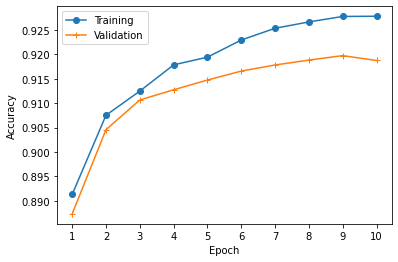

In [13]:
UDA_plot_train_val_accuracy_vs_epoch(train_accuracies, val_accuracies)

      Kernel Shape Output Shape   Params Mult-Adds
Layer                                             
0_0              -     [1, 784]        -         -
1_1     [784, 512]     [1, 512]  401.92k  401.408k
2_2              -     [1, 512]        -         -
3_3      [512, 10]      [1, 10]    5.13k     5.12k
----------------------------------------------------
                        Totals
Total params           407.05k
Trainable params       407.05k
Non-trainable params       0.0
Mult-Adds             406.528k
Epoch 1 [=                                                 ] 1024/48000

/Users/georgehc/opt/anaconda3/lib/python3.9/site-packages/torchsummaryX/torchsummaryX.py:101: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sum = df.sum()


Epoch 1 [==================================================] 48000/48000
  Train accuracy: 0.9521
  Validation accuracy: 0.9438
Epoch 2 [==================================================] 48000/48000
  Train accuracy: 0.9719
  Validation accuracy: 0.9650
Epoch 3 [==================================================] 48000/48000
  Train accuracy: 0.9805
  Validation accuracy: 0.9706
Epoch 4 [==================================================] 48000/48000
  Train accuracy: 0.9864
  Validation accuracy: 0.9748
Epoch 5 [==================================================] 48000/48000
  Train accuracy: 0.9902
  Validation accuracy: 0.9765
Epoch 6 [==================================================] 48000/48000
  Train accuracy: 0.9921
  Validation accuracy: 0.9754
Epoch 7 [==================================================] 48000/48000
  Train accuracy: 0.9943
  Validation accuracy: 0.9779
Epoch 8 [==================================================] 48000/48000
  Train accuracy: 0.9943
  Vali

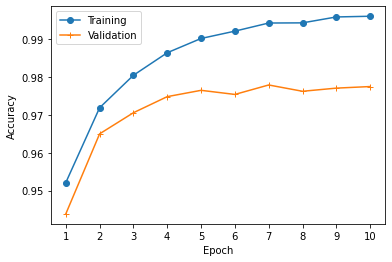

In [14]:
deeper_model = nn.Sequential(nn.Flatten(),
                             nn.Linear(in_features=784, out_features=512),
                             nn.ReLU(),
                             nn.Linear(in_features=512, out_features=10))
summary(deeper_model, torch.zeros((1, 1, 28, 28)))  # (batch size, num channels, height, width)

train_accuracies, val_accuracies = \
    UDA_pytorch_classifier_fit(deeper_model,
                               torch.optim.Adam(deeper_model.parameters(),
                                                lr=learning_rate),
                               nn.CrossEntropyLoss(),  # includes softmax
                               proper_train_dataset, val_dataset,
                               num_epochs, batch_size)

UDA_plot_train_val_accuracy_vs_epoch(train_accuracies, val_accuracies)

## Convnets

In [15]:
simple_convnet = nn.Sequential(nn.Conv2d(1, 32, 3),
                               nn.ReLU(),
                               nn.MaxPool2d(2),
                               nn.Flatten(),
                               nn.Linear(in_features=5408, out_features=10))
summary(simple_convnet, torch.zeros((1, 1, 28, 28)))  # (batch size, num channels, height, width)

        Kernel Shape     Output Shape  Params Mult-Adds
Layer                                                  
0_0    [1, 32, 3, 3]  [1, 32, 26, 26]   320.0  194.688k
1_1                -  [1, 32, 26, 26]       -         -
2_2                -  [1, 32, 13, 13]       -         -
3_3                -        [1, 5408]       -         -
4_4       [5408, 10]          [1, 10]  54.09k    54.08k
---------------------------------------------------------
                        Totals
Total params            54.41k
Trainable params        54.41k
Non-trainable params       0.0
Mult-Adds             248.768k


/Users/georgehc/opt/anaconda3/lib/python3.9/site-packages/torchsummaryX/torchsummaryX.py:101: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sum = df.sum()


,Kernel Shape,Output Shape,Params,Mult-Adds
Layer,,,,
0_0,"[1, 32, 3, 3]","[1, 32, 26, 26]",320.0,194688.0
1_1,-,"[1, 32, 26, 26]",NaN,NaN
2_2,-,"[1, 32, 13, 13]",NaN,NaN
3_3,-,"[1, 5408]",NaN,NaN
4_4,"[5408, 10]","[1, 10]",54090.0,54080.0


Epoch 1 [==================================================] 48000/48000
  Train accuracy: 0.9540
  Validation accuracy: 0.9507
Epoch 2 [==================================================] 48000/48000
  Train accuracy: 0.9722
  Validation accuracy: 0.9683
Epoch 3 [==================================================] 48000/48000
  Train accuracy: 0.9797
  Validation accuracy: 0.9758
Epoch 4 [==================================================] 48000/48000
  Train accuracy: 0.9847
  Validation accuracy: 0.9802
Epoch 5 [==================================================] 48000/48000
  Train accuracy: 0.9872
  Validation accuracy: 0.9816
Epoch 6 [==================================================] 48000/48000
  Train accuracy: 0.9880
  Validation accuracy: 0.9816
Epoch 7 [==================================================] 48000/48000
  Train accuracy: 0.9896
  Validation accuracy: 0.9822
Epoch 8 [==================================================] 48000/48000
  Train accuracy: 0.9911
  Vali

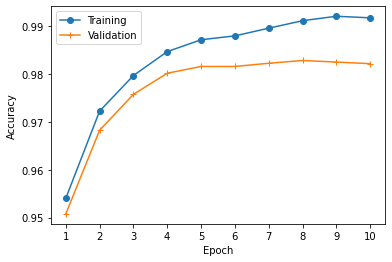

In [16]:
train_accuracies, val_accuracies = \
    UDA_pytorch_classifier_fit(simple_convnet,
                               torch.optim.Adam(simple_convnet.parameters(),
                                                lr=learning_rate),
                               nn.CrossEntropyLoss(),  # includes softmax
                               proper_train_dataset, val_dataset,
                               num_epochs, batch_size)

UDA_plot_train_val_accuracy_vs_epoch(train_accuracies, val_accuracies)

In [17]:
deeper_convnet = nn.Sequential(nn.Conv2d(1, 32, 3),
                               nn.ReLU(),
                               nn.MaxPool2d(2),
                               nn.Conv2d(32, 16, 3),
                               nn.ReLU(),
                               nn.MaxPool2d(2),
                               nn.Flatten(),
                               nn.Linear(in_features=400, out_features=10))
summary(deeper_convnet, torch.zeros((1, 1, 28, 28)))  # (batch size, num channels, height, width)

         Kernel Shape     Output Shape  Params Mult-Adds
Layer                                                   
0_0     [1, 32, 3, 3]  [1, 32, 26, 26]   320.0  194.688k
1_1                 -  [1, 32, 26, 26]       -         -
2_2                 -  [1, 32, 13, 13]       -         -
3_3    [32, 16, 3, 3]  [1, 16, 11, 11]  4.624k  557.568k
4_4                 -  [1, 16, 11, 11]       -         -
5_5                 -    [1, 16, 5, 5]       -         -
6_6                 -         [1, 400]       -         -
7_7         [400, 10]          [1, 10]   4.01k      4.0k
---------------------------------------------------------
                        Totals
Total params            8.954k
Trainable params        8.954k
Non-trainable params       0.0
Mult-Adds             756.256k


/Users/georgehc/opt/anaconda3/lib/python3.9/site-packages/torchsummaryX/torchsummaryX.py:101: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sum = df.sum()


,Kernel Shape,Output Shape,Params,Mult-Adds
Layer,,,,
0_0,"[1, 32, 3, 3]","[1, 32, 26, 26]",320.0,194688.0
1_1,-,"[1, 32, 26, 26]",NaN,NaN
2_2,-,"[1, 32, 13, 13]",NaN,NaN
3_3,"[32, 16, 3, 3]","[1, 16, 11, 11]",4624.0,557568.0
4_4,-,"[1, 16, 11, 11]",NaN,NaN
5_5,-,"[1, 16, 5, 5]",NaN,NaN
6_6,-,"[1, 400]",NaN,NaN
7_7,"[400, 10]","[1, 10]",4010.0,4000.0


Epoch 1 [==================================================] 48000/48000
  Train accuracy: 0.9564
  Validation accuracy: 0.9556
Epoch 2 [==================================================] 48000/48000
  Train accuracy: 0.9711
  Validation accuracy: 0.9712
Epoch 3 [==================================================] 48000/48000
  Train accuracy: 0.9771
  Validation accuracy: 0.9754
Epoch 4 [==================================================] 48000/48000
  Train accuracy: 0.9810
  Validation accuracy: 0.9802
Epoch 5 [==================================================] 48000/48000
  Train accuracy: 0.9829
  Validation accuracy: 0.9820
Epoch 6 [==================================================] 48000/48000
  Train accuracy: 0.9843
  Validation accuracy: 0.9822
Epoch 7 [==================================================] 48000/48000
  Train accuracy: 0.9841
  Validation accuracy: 0.9827
Epoch 8 [==================================================] 48000/48000
  Train accuracy: 0.9873
  Vali

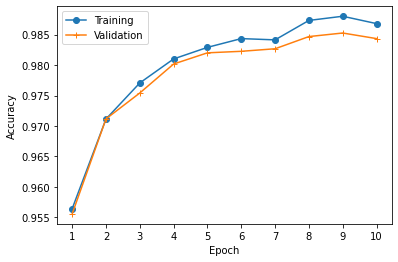

In [18]:
train_accuracies, val_accuracies = \
    UDA_pytorch_classifier_fit(deeper_convnet,
                               torch.optim.Adam(deeper_convnet.parameters(),
                                                lr=learning_rate),
                               nn.CrossEntropyLoss(),  # includes softmax
                               proper_train_dataset, val_dataset,
                               num_epochs, batch_size)

UDA_plot_train_val_accuracy_vs_epoch(train_accuracies, val_accuracies)

## Finally evaluate on test data

In [19]:
test_dataset = torchvision.datasets.MNIST(root='data/',
                                          train=False,
                                          transform=transforms.ToTensor(),
                                          download=True)
test_images = torch.tensor(np.array([image.numpy() for image, label in test_dataset]))

In [20]:
predicted_test_labels = UDA_pytorch_classifier_predict(simple_model, test_images)
print('Test accuracy:', UDA_compute_accuracy(predicted_test_labels, test_dataset.targets))

Test accuracy: 0.9241


In [21]:
predicted_test_labels = UDA_pytorch_classifier_predict(deeper_model, test_images)
print('Test accuracy:', UDA_compute_accuracy(predicted_test_labels, test_dataset.targets))

Test accuracy: 0.9767


In [22]:
predicted_test_labels = UDA_pytorch_classifier_predict(simple_convnet, test_images)
print('Test accuracy:', UDA_compute_accuracy(predicted_test_labels, test_dataset.targets))

Test accuracy: 0.9816


In [23]:
predicted_test_labels = UDA_pytorch_classifier_predict(deeper_convnet, test_images)
print('Test accuracy:', UDA_compute_accuracy(predicted_test_labels, test_dataset.targets))

Test accuracy: 0.9838
